In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
import sweetviz 

In [2]:
df=pd.read_csv('Medicalpremium.csv')

# Exploring dataset

In [3]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [5]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

# Performing EDA to see the distribution of data

In [6]:
my_report=sweetviz.analyze([df,'train'],target_feat='PremiumPrice')
my_report.show_html('Report.html')


Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Creating salary-bins to visualize distribution of Premium Price and Age

In [7]:
pr_lab=['Low','Basic','Average','High','SuperHigh']
df['PremiumLabel']=pr_bins=pd.cut(df['PremiumPrice'],bins=5,labels=pr_lab,precision=0)

In [8]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'PremiumLabel'],
      dtype='object')

In [9]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel
0,45,0,0,0,0,155,57,0,0,0,25000,Basic
1,60,1,0,0,0,180,73,0,0,0,29000,Average
2,36,1,1,0,0,158,59,0,0,1,23000,Basic
3,52,1,1,0,1,183,93,0,0,2,28000,Average
4,38,0,0,0,1,166,88,0,0,1,23000,Basic


<AxesSubplot:xlabel='PremiumLabel', ylabel='Age'>

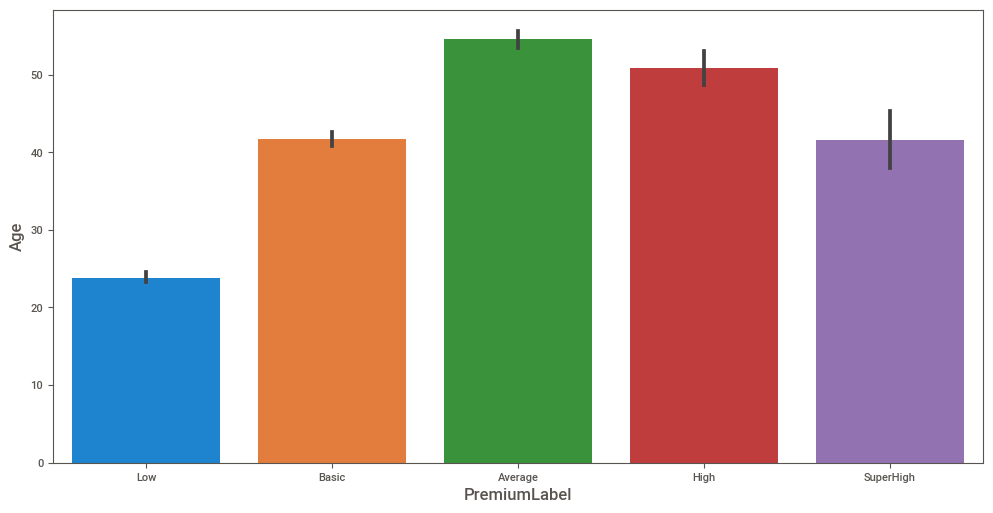

In [10]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(y='Age',x='PremiumLabel',data=df,ax=ax)

# Converting new categorical columns to numeric ones(One hot encoding)

In [11]:
df=pd.get_dummies(data=df,columns=['Age','PremiumLabel'])

In [12]:
df.columns

Index(['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'Age_18', 'Age_19', 'Age_20', 'Age_21', 'Age_22', 'Age_23', 'Age_24',
       'Age_25', 'Age_26', 'Age_27', 'Age_28', 'Age_29', 'Age_30', 'Age_31',
       'Age_32', 'Age_33', 'Age_34', 'Age_35', 'Age_36', 'Age_37', 'Age_38',
       'Age_39', 'Age_40', 'Age_41', 'Age_42', 'Age_43', 'Age_44', 'Age_45',
       'Age_46', 'Age_47', 'Age_48', 'Age_49', 'Age_50', 'Age_51', 'Age_52',
       'Age_53', 'Age_54', 'Age_55', 'Age_56', 'Age_57', 'Age_58', 'Age_59',
       'Age_60', 'Age_61', 'Age_62', 'Age_63', 'Age_64', 'Age_65', 'Age_66',
       'PremiumLabel_Low', 'PremiumLabel_Basic', 'PremiumLabel_Average',
       'PremiumLabel_High', 'PremiumLabel_SuperHigh'],
      dtype='object')

In [13]:
df.describe()

,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,...,Age_62,Age_63,Age_64,Age_65,Age_66,PremiumLabel_Low,PremiumLabel_Basic,PremiumLabel_Average,PremiumLabel_High,PremiumLabel_SuperHigh
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,...,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996,...,0.021298,0.019270,0.022312,0.017241,0.023327,0.227181,0.388438,0.262677,0.079108,0.042596
std,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382,...,0.144450,0.137541,0.147772,0.130236,0.151015,0.419223,0.487642,0.440312,0.270043,0.202048
min,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# New Dataset

In [14]:
df.head()

,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,...,Age_62,Age_63,Age_64,Age_65,Age_66,PremiumLabel_Low,PremiumLabel_Basic,PremiumLabel_Average,PremiumLabel_High,PremiumLabel_SuperHigh
0,0,0,0,0,155,57,0,0,0,25000,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,180,73,0,0,0,29000,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,158,59,0,0,1,23000,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,183,93,0,0,2,28000,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,166,88,0,0,1,23000,...,0,0,0,0,0,0,1,0,0,0


In [15]:
df.shape

(986, 64)

# Getting Features and Target datasets

In [16]:
x=df.drop('PremiumPrice',axis=1)
y=df['PremiumPrice']

In [17]:
x.columns

Index(['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'Age_18', 'Age_19',
       'Age_20', 'Age_21', 'Age_22', 'Age_23', 'Age_24', 'Age_25', 'Age_26',
       'Age_27', 'Age_28', 'Age_29', 'Age_30', 'Age_31', 'Age_32', 'Age_33',
       'Age_34', 'Age_35', 'Age_36', 'Age_37', 'Age_38', 'Age_39', 'Age_40',
       'Age_41', 'Age_42', 'Age_43', 'Age_44', 'Age_45', 'Age_46', 'Age_47',
       'Age_48', 'Age_49', 'Age_50', 'Age_51', 'Age_52', 'Age_53', 'Age_54',
       'Age_55', 'Age_56', 'Age_57', 'Age_58', 'Age_59', 'Age_60', 'Age_61',
       'Age_62', 'Age_63', 'Age_64', 'Age_65', 'Age_66', 'PremiumLabel_Low',
       'PremiumLabel_Basic', 'PremiumLabel_Average', 'PremiumLabel_High',
       'PremiumLabel_SuperHigh'],
      dtype='object')

## Scalling the dataset

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xsc=sc.fit_transform(x)

In [19]:
xsc=pd.DataFrame(xsc,columns=x.columns)

# Splitting into Test and Train datasets

In [20]:
from sklearn.model_selection import train_test_split

## SPLITTING dataset

In [21]:
xtr,xte,ytr,yte=train_test_split(xsc,y,random_state=33,test_size=0.3)

# Building ML model

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [23]:
rfg=RandomForestRegressor(n_jobs=-1,verbose=2)
param_grid={'n_estimators':[60,50,55],
            'criterion':['mse','mae'],
            'max_depth':[7],'min_samples_split':[3],
            'max_features':['auto']}

In [24]:
from xgboost import XGBRegressor
scores = []
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9]}
model = XGBRegressor()
gs = GridSearchCV(model, param_grid, cv=5)
gs.fit(xtr, ytr)
gb_score = gs.score(xte,yte)
print('Test Score : {:.4f}'.format(gb_score))
print('Best Parameters :', gs.best_params_)
print('Best CV Score : {:.4f}'.format(gs.best_score_))
scores.append(gb_score)


gs=GridSearchCV(model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)

Test Score : 0.9857
Best Parameters : {'max_depth': 7}
Best CV Score : 0.9900


In [25]:
gs.fit(xtr,ytr)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [26]:
#rfg.fit(xtr,ytr)

In [27]:
gs.best_params_

{'max_depth': 5}

In [28]:
gs.best_score_

0.9886738959698277

In [29]:
predicted_y=gs.predict(xte)


# Testing the accuracy of model

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(yte,predicted_y)

0.9875989593103343